# Project 1 - Oregon Wildfire Data

In [44]:
import json
import requests
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import matplotlib.colors as mcolors
from config import api_key
from sklearn.linear_model import LinearRegression
from datetime import datetime
import math
import seaborn as sns

In [45]:
# Import weather data CSV

weather_data_path = "Adam/portland_weather_data_1.csv"
weather_data = pd.read_csv(weather_data_path)

weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-01,0.05,0.0,0.0,36,40,32
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-02,0.00,0.0,0.0,34,35,29
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-03,0.00,0.0,0.0,31,34,27
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-04,0.00,0.0,0.0,29,33,27
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-05,0.00,0.0,0.0,27,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
2187,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
2188,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
2189,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [46]:
# Convert Date to Python datetime

weather_data_2 = weather_data.copy()

weather_data_2['DATE'] = pd.to_datetime(weather_data_2['DATE'])

weather_data_2

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-01,0.05,0.0,0.0,36,40,32
1,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-02,0.00,0.0,0.0,34,35,29
2,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-03,0.00,0.0,0.0,31,34,27
3,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-04,0.00,0.0,0.0,29,33,27
4,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2017-01-05,0.00,0.0,0.0,27,35,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-27,1.21,0.0,0.0,47,55,44
2187,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-28,0.00,0.0,0.0,46,49,42
2188,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-29,0.53,0.0,0.0,44,45,42
2189,USW00024229,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,2022-12-30,0.30,0.0,0.0,47,55,42


In [47]:
#read csv on wild fire data and create DataFrame
fire_data_path=("ODF_Fire_Occurrence_Data_2000-2022 (1).csv")
fire_data=pd.read_csv(fire_data_path)
fire_data.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013


In [48]:
# Our project only wants to review data in the last 5 years.
#Create copy of original csv
fire_data2= fire_data.copy()


In [49]:
#limit the year to the last 5 years (2022-5=2017 or greater
#reduce dataframe to remove data prior to 2017
fire_data2.drop(fire_data2.loc[fire_data2["FireYear"]<2018].index, inplace=True)
fire_data2.head()

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
45,110203,STAT,2018,NOA,Astoria,Astoria,18-521071-18,Big O,A,0.01,...,Outside Closed Fire Season,06/03/2018 10:00:00 AM,06/04/2018 07:00:00 AM,06/04/2018 06:55:00 AM,06/04/2018 07:45:00 AM,06/04/2018 12:00:00 AM,06/04/2018 09:50:00 AM,52,521,071
46,113641,STAT,2018,NOA,North Cascade,Santiam,18-582069-19,Oak Knoll Rd,B,0.75,...,Lvl 1 Fire Season Only,10/23/2018 02:45:00 PM,10/23/2018 02:45:00 PM,10/23/2018 02:45:00 PM,10/23/2018 03:00:00 PM,10/23/2018 12:00:00 AM,11/06/2018 09:59:00 AM,58,582,069
47,110423,STAT,2018,SOA,Southwest Oregon,Medford,18-711502-18,Grizzly,A,0.10,...,Lvl 1 Fire Season Only,06/20/2018 03:19:00 PM,06/20/2018 07:55:00 PM,06/20/2018 07:50:00 PM,06/21/2018 02:50:00 AM,06/21/2018 12:00:00 AM,06/21/2018 03:29:00 PM,71,711,502
48,113120,STAT,2018,EOA,Central Oregon,Sisters,18-955070-19,Ponderosa Way 1207,A,NaN,...,NaN,NaN,09/24/2018 03:46:00 PM,NaN,NaN,09/24/2018 12:00:00 AM,09/24/2018 04:30:00 PM,95,955,070
49,110255,STAT,2018,EOA,Northeast Oregon,Wallowa,18-974052-18,Johnson Canyon,A,0.10,...,Outside Closed Fire Season,06/07/2018 08:17:00 PM,06/08/2018 06:25:00 AM,06/08/2018 06:17:00 AM,06/08/2018 04:00:00 PM,06/08/2018 12:00:00 AM,07/31/2018 04:44:00 PM,97,974,052


In [50]:
#export fire data as csv
fire_data2.to_csv("../Wildfires-OR-18.22.csv", index_label="fire_data2")

In [51]:
fire_data2['Control_DateTime'] = pd.to_datetime(fire_data2['Control_DateTime'])
fire_data2['Ign_DateTime']=pd.to_datetime(fire_data2['Ign_DateTime'])

In [52]:
#Calculate timespan of burn (control time - ign time)
timespan=(fire_data2['Control_DateTime']-fire_data2['Ign_DateTime'])

In [53]:
#create group by variables
year=fire_data2["FireYear"]
Acres=(fire_data2["EstTotalAcres"])/1000
Human=fire_data2["HumanOrLightning"]
Gen_Cause=fire_data2["GeneralCause"]
SP_Cause=fire_data2["SpecificCause"]
county=fire_data2["County"]
name=fire_data2["FireName"]

In [54]:
#create dataframe
county_data=pd.DataFrame({"Year": year,
                          "County": county,
                          "Fire Name": name,
                          "Human or Nature": Human,
                          "Cause of Fire": Gen_Cause,
                          "Specifics": SP_Cause,
                          "Time Burning": timespan,
                          "Acres per 1000" : Acres})

county_data

,Year,County,Fire Name,Human or Nature,Cause of Fire,Specifics,Time Burning,Acres per 1000
45,2018,Clatsop,Big O,Human,Debris Burning,Unattended,0 days 21:45:00,0.00001
46,2018,Marion,Oak Knoll Rd,Human,Debris Burning,Other - Burning Related,0 days 00:15:00,0.00075
47,2018,Jackson,Grizzly,Lightning,Lightning,Lightning,0 days 11:31:00,0.00010
48,2018,Deschutes,Ponderosa Way 1207,Human,Miscellaneous,NaN,NaT,NaN
49,2018,Wallowa,Johnson Canyon,Lightning,Lightning,Lightning,0 days 19:43:00,0.00010
...,...,...,...,...,...,...,...,...
23485,2021,Klamath,Road 2430,Human,Equipment Use,Heat from Vehicle Manifold or Exhaust,0 days 05:58:00,0.00075
23486,2022,Lane,Spruce Path,Human,Recreation,"Campfire Left Unattended (camp site, cooking)",0 days 00:54:00,0.00001
23487,2021,Umatilla,Bone Canyon,Lightning,Lightning,Lightning,3 days 23:48:00,0.06743
23488,2022,Umatilla,Milepost 231,Human,Equipment Use,Burning Vehicle or Equipment,0 days 01:32:00,0.00010


In [55]:
#convert date to pandas datetime

fire_data3 = fire_data2.copy() # https://datascienceparichay.com/article/remove-time-from-date-pandas/
fire_data3["DATE"] = fire_data3["Ign_DateTime"].dt.date
fire_data3["DATE"] = pd.to_datetime(fire_data3["DATE"])
fire_data3

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,DATE
45,110203,STAT,2018,NOA,Astoria,Astoria,18-521071-18,Big O,A,0.01,...,2018-06-03 10:00:00,06/04/2018 07:00:00 AM,06/04/2018 06:55:00 AM,2018-06-04 07:45:00,06/04/2018 12:00:00 AM,06/04/2018 09:50:00 AM,52,521,071,2018-06-03
46,113641,STAT,2018,NOA,North Cascade,Santiam,18-582069-19,Oak Knoll Rd,B,0.75,...,2018-10-23 14:45:00,10/23/2018 02:45:00 PM,10/23/2018 02:45:00 PM,2018-10-23 15:00:00,10/23/2018 12:00:00 AM,11/06/2018 09:59:00 AM,58,582,069,2018-10-23
47,110423,STAT,2018,SOA,Southwest Oregon,Medford,18-711502-18,Grizzly,A,0.10,...,2018-06-20 15:19:00,06/20/2018 07:55:00 PM,06/20/2018 07:50:00 PM,2018-06-21 02:50:00,06/21/2018 12:00:00 AM,06/21/2018 03:29:00 PM,71,711,502,2018-06-20
48,113120,STAT,2018,EOA,Central Oregon,Sisters,18-955070-19,Ponderosa Way 1207,A,NaN,...,NaT,09/24/2018 03:46:00 PM,NaN,NaT,09/24/2018 12:00:00 AM,09/24/2018 04:30:00 PM,95,955,070,NaT
49,110255,STAT,2018,EOA,Northeast Oregon,Wallowa,18-974052-18,Johnson Canyon,A,0.10,...,2018-06-07 20:17:00,06/08/2018 06:25:00 AM,06/08/2018 06:17:00 AM,2018-06-08 16:00:00,06/08/2018 12:00:00 AM,07/31/2018 04:44:00 PM,97,974,052,2018-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,2021-06-26 16:00:00,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,2021-06-26 21:58:00,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258,2021-06-26
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,2022-09-13 11:20:00,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,2022-09-13 12:14:00,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066,2022-09-13
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,2021-06-13 17:22:00,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,2021-06-17 17:10:00,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052,2021-06-13
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,2022-08-19 15:09:00,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,2022-08-19 16:41:00,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014,2022-08-19


In [56]:
# Merge fire and weather data

weather_data_3 = weather_data_2.copy()
fire_data4 = fire_data3.copy()

weather_and_fire_data = pd.merge(fire_data4, weather_data_3, on="DATE", how="outer")
weather_and_fire_data

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,110203.0,STAT,2018.0,NOA,Astoria,Astoria,18-521071-18,Big O,A,0.01,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.03,0.0,0.0,67.0,72.0,56.0
1,110324.0,STAT,2018.0,SOA,Douglas - DFPA,DFPA Central,18-733196-18,Byron Creek,B,0.50,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.03,0.0,0.0,67.0,72.0,56.0
2,110197.0,STAT,2018.0,SOA,Coos - CFPA,Gold Beach,18-723144-18,Oberman Rd,A,0.25,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.03,0.0,0.0,67.0,72.0,56.0
3,110196.0,STAT,2018.0,SOA,Southwest Oregon,Grants Pass,18-712786-18,Westside Rd 5601,A,0.01,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.03,0.0,0.0,67.0,72.0,56.0
4,110207.0,STAT,2018.0,SOA,Southwest Oregon,Grants Pass,18-712789-18,Rockydale Rd 3368,A,0.10,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.03,0.0,0.0,67.0,72.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,1.21,0.0,0.0,47.0,55.0,44.0
6229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.00,0.0,0.0,46.0,49.0,42.0
6230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.53,0.0,0.0,44.0,45.0,42.0
6231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,6.7,0.30,0.0,0.0,47.0,55.0,42.0


In [57]:
# Drop unneeded columns

weather_and_fire_data_2 = weather_and_fire_data.copy()
weather_and_fire_data_3 = weather_and_fire_data_2.drop(["Serial", "FireCategory", "Area", "UnitName", "FullFireNumber", "Protected_Acres", "Size_class", "HumanOrLightning", "Cause_Comments", 
                                                        "CauseBy", "LatLongDD", "FO_LandOwnType", "ModifiedDate", "DistrictCode", "Twn", "Rng", "CreationDate", "UnitCode", "DistFireNumber", 
                                                        "Subdiv", "Sec", "Discover_DateTime", "LandmarkLocation", "ReportDateTime", "RegUseZone", "RegUseRestriction", "Industrial_Restriction", "STATION", "ELEVATION", "SNOW", "SNWD"], axis="columns")
weather_and_fire_data_3

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,DATE,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
0,2018.0,Astoria,Big O,0.01,Debris Burning,Unattended,46.10078,-123.76050,Clatsop,2018-06-03 10:00:00,2018-06-04 07:45:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
1,2018.0,Douglas - DFPA,Byron Creek,0.50,Debris Burning,Burn Barrel,43.02417,-123.54667,Douglas,2018-06-03 14:00:00,2018-06-03 15:00:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2,2018.0,Coos - CFPA,Oberman Rd,0.25,Debris Burning,Inadequate clearing,43.08583,-124.42111,Coos,2018-06-03 10:30:00,2018-06-03 13:00:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
3,2018.0,Southwest Oregon,Westside Rd 5601,0.01,Debris Burning,Inadequate Mop Up,42.13768,-123.67093,Josephine,2018-06-03 08:00:00,2018-06-06 12:16:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
4,2018.0,Southwest Oregon,Rockydale Rd 3368,0.10,Debris Burning,Inadequate Mop Up,42.11905,-123.63808,Josephine,2018-06-03 18:00:00,2018-06-07 14:30:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-27,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,1.21,47.0,55.0,44.0
6229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-28,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,46.0,49.0,42.0
6230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-29,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.53,44.0,45.0,42.0
6231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,2022-12-30,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.30,47.0,55.0,42.0


In [58]:
# set index to date

weather_and_fire_data_4 = weather_and_fire_data_3.set_index("DATE")
weather_and_fire_data_4

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,
2018-06-03,2018.0,Astoria,Big O,0.01,Debris Burning,Unattended,46.10078,-123.76050,Clatsop,2018-06-03 10:00:00,2018-06-04 07:45:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2018-06-03,2018.0,Douglas - DFPA,Byron Creek,0.50,Debris Burning,Burn Barrel,43.02417,-123.54667,Douglas,2018-06-03 14:00:00,2018-06-03 15:00:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2018-06-03,2018.0,Coos - CFPA,Oberman Rd,0.25,Debris Burning,Inadequate clearing,43.08583,-124.42111,Coos,2018-06-03 10:30:00,2018-06-03 13:00:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2018-06-03,2018.0,Southwest Oregon,Westside Rd 5601,0.01,Debris Burning,Inadequate Mop Up,42.13768,-123.67093,Josephine,2018-06-03 08:00:00,2018-06-06 12:16:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2018-06-03,2018.0,Southwest Oregon,Rockydale Rd 3368,0.10,Debris Burning,Inadequate Mop Up,42.11905,-123.63808,Josephine,2018-06-03 18:00:00,2018-06-07 14:30:00,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,1.21,47.0,55.0,44.0
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,46.0,49.0,42.0
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.53,44.0,45.0,42.0


In [59]:
# drop null rows so that only days with fires are kept in the dataframe

weather_and_fire_data_cleaned = weather_and_fire_data_3.dropna(how="any")
weather_and_fire_data_cleaned

,FireYear,DistrictName,FireName,EstTotalAcres,GeneralCause,SpecificCause,Lat_DD,Long_DD,County,Ign_DateTime,Control_DateTime,DATE,NAME,LATITUDE,LONGITUDE,PRCP,TAVG,TMAX,TMIN
0,2018.0,Astoria,Big O,0.01,Debris Burning,Unattended,46.10078,-123.76050,Clatsop,2018-06-03 10:00:00,2018-06-04 07:45:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
1,2018.0,Douglas - DFPA,Byron Creek,0.50,Debris Burning,Burn Barrel,43.02417,-123.54667,Douglas,2018-06-03 14:00:00,2018-06-03 15:00:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
2,2018.0,Coos - CFPA,Oberman Rd,0.25,Debris Burning,Inadequate clearing,43.08583,-124.42111,Coos,2018-06-03 10:30:00,2018-06-03 13:00:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
3,2018.0,Southwest Oregon,Westside Rd 5601,0.01,Debris Burning,Inadequate Mop Up,42.13768,-123.67093,Josephine,2018-06-03 08:00:00,2018-06-06 12:16:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
4,2018.0,Southwest Oregon,Rockydale Rd 3368,0.10,Debris Burning,Inadequate Mop Up,42.11905,-123.63808,Josephine,2018-06-03 18:00:00,2018-06-07 14:30:00,2018-06-03,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.03,67.0,72.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,2022.0,Southwest Oregon,Wolf Tracks,0.10,Recreation,Warming Fire Unattended,42.65453,-123.47417,Josephine,2022-04-08 23:00:00,2022-04-09 18:00:00,2022-04-08,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.08,59.0,61.0,43.0
5132,2022.0,Northeast Oregon,Eclipse,0.13,Lightning,Lightning,45.16917,-118.91417,Umatilla,2022-05-15 16:28:00,2022-05-16 16:28:00,2022-05-15,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.18,63.0,70.0,57.0
5133,2021.0,Klamath-Lake,Pond 114,0.10,Miscellaneous,Other - Miscellaneous Related,42.34306,-121.40000,Klamath,2021-03-30 19:00:00,2021-03-30 22:45:00,2021-03-30,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,43.0,55.0,33.0
5135,2022.0,Southwest Oregon,Sterling Creek 11066,1.00,Miscellaneous,Spontaneous Combustion,42.18772,-123.00255,Jackson,2022-06-15 11:50:00,2022-06-15 12:28:00,2022-06-15,"PORTLAND INTERNATIONAL AIRPORT, OR US",45.59578,-122.60919,0.00,58.0,71.0,51.0


In [60]:
# Drop unneeded columns

weather_and_fire_data_cleaned_2 = weather_and_fire_data_cleaned.drop(["DistrictName", "FireName", "GeneralCause", "SpecificCause", "County", "NAME"], axis="columns")
weather_fire_grouped = weather_and_fire_data_cleaned_2.groupby(["DATE"], as_index=False).agg({"EstTotalAcres": "sum", "PRCP": "mean", "TAVG": "mean", "TMAX": "mean"})
weather_fire_grouped

,DATE,EstTotalAcres,PRCP,TAVG,TMAX
0,2017-11-13,19.30,0.36,51.0,56.0
1,2017-11-15,0.01,0.86,51.0,56.0
2,2017-11-25,0.10,0.12,44.0,49.0
3,2017-11-28,0.25,0.44,45.0,47.0
4,2017-12-01,0.25,0.02,46.0,50.0
...,...,...,...,...,...
1086,2022-11-19,1.36,0.00,42.0,47.0
1087,2022-11-20,0.85,0.00,38.0,47.0
1088,2022-11-21,0.50,0.00,40.0,46.0
1089,2022-11-22,0.10,0.31,43.0,53.0


In [61]:
# Sum of acres burned, mean of temperature and precipitation data by month. Recombine into one dataframe

weather_fire_acres_burned = weather_fire_grouped.groupby(pd.Grouper(key="DATE", freq="M")).sum() # https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html, grouper
weather_fire_acres_burned = weather_fire_acres_burned.drop(["PRCP", "TAVG", "TMAX"], axis="columns")
weather_fire_temp = weather_fire_grouped.groupby(pd.Grouper(key="DATE", freq="M")).mean()
weather_fire_temp = weather_fire_temp.drop(["EstTotalAcres"], axis="columns")
weather_fire_monthly = pd.merge(weather_fire_acres_burned, weather_fire_temp, on="DATE", how="outer")
weather_fire_monthly = weather_fire_monthly.reset_index()
weather_fire_monthly


,DATE,EstTotalAcres,PRCP,TAVG,TMAX
0,2017-11-30,19.66,0.445000,47.750000,52.000000
1,2017-12-31,0.25,0.020000,46.000000,50.000000
2,2018-01-31,34.07,0.222500,44.500000,53.500000
3,2018-02-28,18.27,0.020000,41.000000,50.000000
4,2018-03-31,3.69,0.036667,48.166667,59.500000
...,...,...,...,...,...
56,2022-07-31,369.30,0.005333,72.466667,85.966667
57,2022-08-31,22085.13,0.000000,73.903226,87.322581
58,2022-09-30,2844.84,0.011071,68.714286,80.750000
59,2022-10-31,516.27,0.104483,60.758621,72.413793


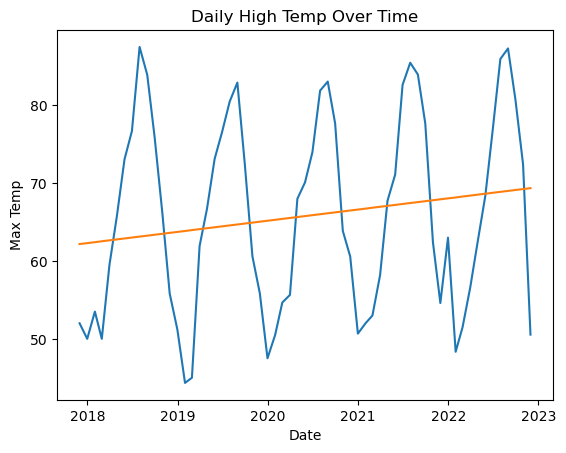

0.11980367587175629


In [62]:
# temperature trend over time

plt.plot(weather_fire_monthly["DATE"], weather_fire_monthly["TMAX"])

dates = np.arange(weather_fire_monthly["DATE"].size) # https://ishan-mehta17.medium.com/simple-linear-regression-fit-and-prediction-on-time-series-data-with-visualization-in-python-41a77baf104c, referenced for how to convert date to float for linregress

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(dates, weather_fire_monthly["TMAX"])
corr_fit = dates * corr_slope + corr_int

#plt.scatter(x, y)
plt.plot(weather_fire_monthly["DATE"], corr_fit)

plt.title("Daily High Temp Over Time")
plt.xlabel("Date")
plt.ylabel("Max Temp")

#plt.text(dates.min(), 70, f"{corr_slope}", horizontalalignment="center", verticalalignment="center")

plt.savefig("Adam/graph_images/lin_regress1.png")

plt.show()

print(corr_slope)

<function matplotlib.pyplot.show(close=None, block=None)>

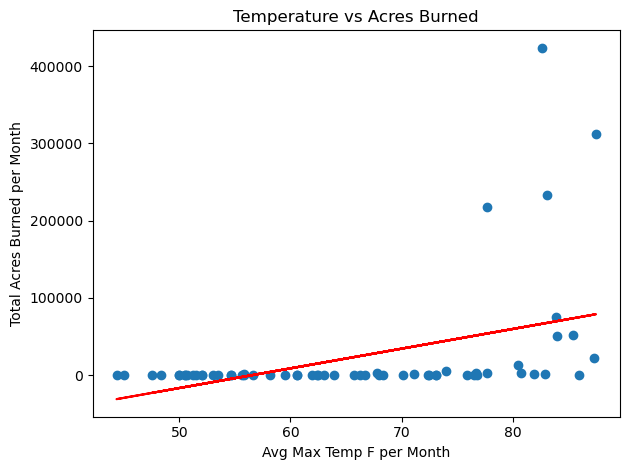

In [63]:
# temperature vs acres burned

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(weather_fire_monthly["TMAX"], weather_fire_monthly["EstTotalAcres"])
corr_fit = weather_fire_monthly["TMAX"] * corr_slope + corr_int

plt.scatter(weather_fire_monthly["TMAX"], weather_fire_monthly["EstTotalAcres"])
plt.plot(weather_fire_monthly["TMAX"], corr_fit, color="r")

plt.xlabel("Avg Max Temp F per Month")
plt.ylabel("Total Acres Burned per Month")
plt.title("Temperature vs Acres Burned")

plt.tight_layout()

plt.savefig("Adam/graph_images/fig3.png")

plt.show

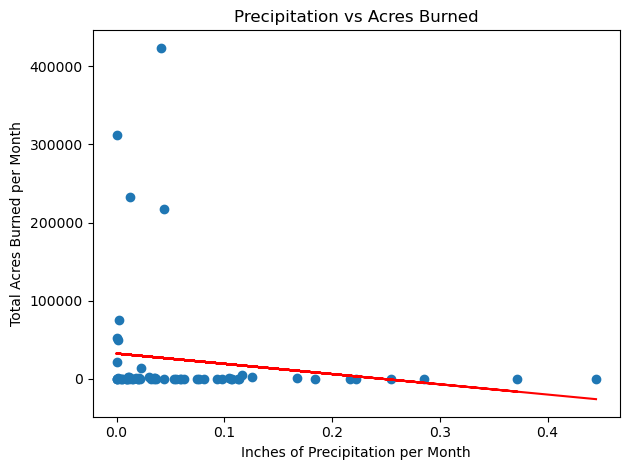

In [64]:
# precipitation vs acres burned

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(weather_fire_monthly["PRCP"], weather_fire_monthly["EstTotalAcres"])
corr_fit = weather_fire_monthly["PRCP"] * corr_slope + corr_int

plt.scatter(weather_fire_monthly["PRCP"], weather_fire_monthly["EstTotalAcres"])
plt.plot(weather_fire_monthly["PRCP"], corr_fit, color="r")

plt.xlabel("Inches of Precipitation per Month")
plt.ylabel("Total Acres Burned per Month")
plt.title("Precipitation vs Acres Burned")

plt.tight_layout()

plt.savefig("Adam/graph_images/fig4.png")

plt.show

print()


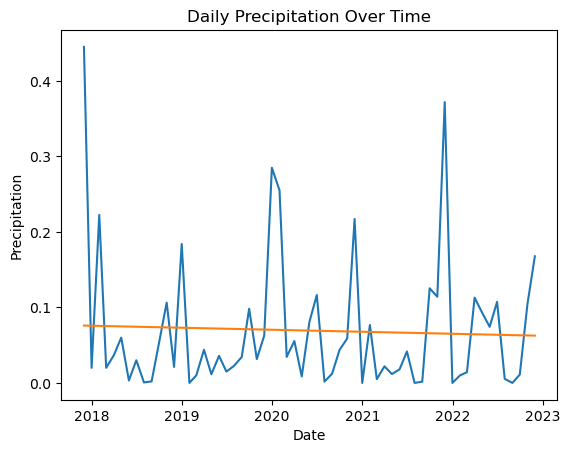

-0.00022191306388678222


In [65]:
# precipitation trend over time

plt.plot(weather_fire_monthly["DATE"], weather_fire_monthly["PRCP"])

dates = np.arange(weather_fire_monthly["DATE"].size)

corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(dates, weather_fire_monthly["PRCP"])
corr_fit = dates * corr_slope + corr_int

#plt.scatter(x, y)
plt.plot(weather_fire_monthly["DATE"], corr_fit)

plt.title("Daily Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.savefig("Adam/graph_images/lin_regress2.png")

plt.show()

print(corr_slope)

In [66]:
temp_corr_coe = round(st.pearsonr(weather_fire_monthly["TMAX"], weather_fire_monthly["EstTotalAcres"])[0], 2)
print(temp_corr_coe)
precip_corr_coe = round(st.pearsonr(weather_fire_monthly["PRCP"], weather_fire_monthly["EstTotalAcres"])[0], 2)
print(precip_corr_coe)

0.42
-0.16


In [67]:
#Create list of counties and the number of fires in each county
Number_of_Fires= county_data["County"].value_counts()
Number_of_Fires

Josephine      796
Jackson        742
Douglas        576
Lane           467
Klamath        381
Coos           237
Deschutes      162
Linn           157
Grant          151
Clackamas      146
Wallowa        139
Clatsop        101
Umatilla        88
Wasco           80
Marion          77
Columbia        75
Union           73
Hood River      66
Curry           65
Lake            63
Wheeler         57
Baker           54
Polk            52
Yamhill         49
Tillamook       48
Crook           45
Benton          43
Lincoln         43
Washington      38
Jefferson       32
Morrow          15
Multnomah        8
Other State      4
Harney           3
ERROR: #N/A      3
Malheur          1
Name: County, dtype: int64

In [68]:
#Fires by county
fires_by_county_s = county_data.groupby("County").count()["Fire Name"]
fires_by_county_s

County
Baker           54
Benton          43
Clackamas      146
Clatsop        101
Columbia        75
Coos           237
Crook           45
Curry           65
Deschutes      162
Douglas        576
ERROR: #N/A      3
Grant          151
Harney           3
Hood River      66
Jackson        742
Jefferson       32
Josephine      796
Klamath        381
Lake            63
Lane           467
Lincoln         43
Linn           157
Malheur          1
Marion          77
Morrow          15
Multnomah        8
Other State      4
Polk            52
Tillamook       48
Umatilla        88
Union           73
Wallowa        139
Wasco           80
Washington      38
Wheeler         57
Yamhill         49
Name: Fire Name, dtype: int64

In [69]:
#Create chart to show # of fires per year with the number of acres burned each year
#create variable/group to capture how many fires were ignited each year
fires_by_year_s=county_data.groupby(["Year"]).count()["Fire Name"]
fires_by_year_s

Year
2018    1112
2019    1020
2020     983
2021    1134
2022     888
Name: Fire Name, dtype: int64

In [70]:
#create variable to show how many acres were burned each year
acres_by_year_s = county_data.groupby(["Year"]).sum()["Acres per 1000"]
acres_by_year_s


C:\Users\dmrop\AppData\Local\Temp\ipykernel_7152\3000002924.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acres_by_year_s = county_data.groupby(["Year"]).sum()["Acres per 1000"]


Year
2018     461.53695
2019      17.24732
2020    1149.39845
2021     676.26907
2022     208.89972
Name: Acres per 1000, dtype: float64

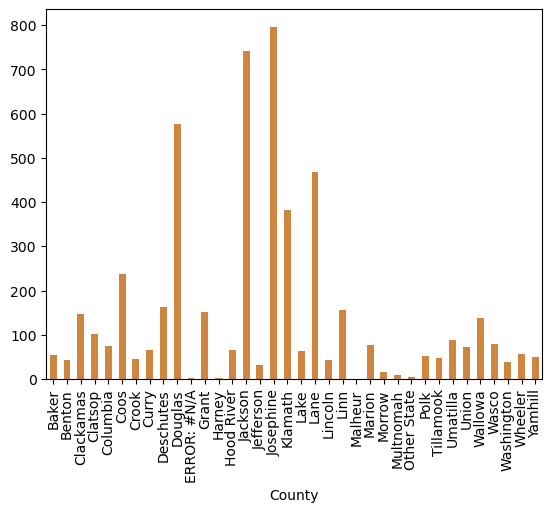

In [71]:
fires_by_county_s.plot(kind="bar", color="peru")

plt.show()

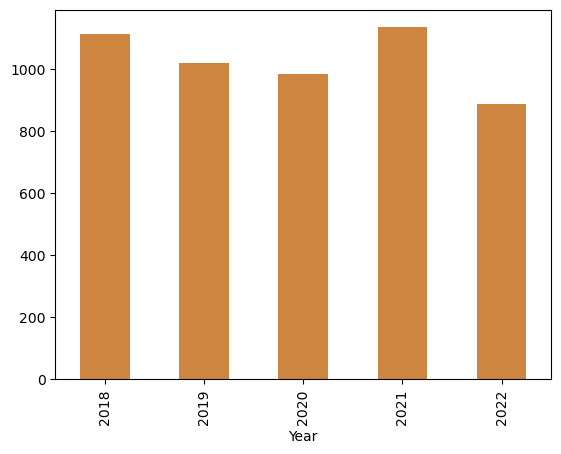

In [72]:
fires_by_year_s.plot(kind="bar", color="peru")

plt.show()

In [73]:
#Merge together number of fires and acres burned
double_year_df = pd.DataFrame({
    "Number of Fires": fires_by_year_s,
    "Acres Burned per 1000": acres_by_year_s
})
double_year_df

,Number of Fires,Acres Burned per 1000
Year,,
2018,1112,461.53695
2019,1020,17.24732
2020,983,1149.39845
2021,1134,676.26907
2022,888,208.89972


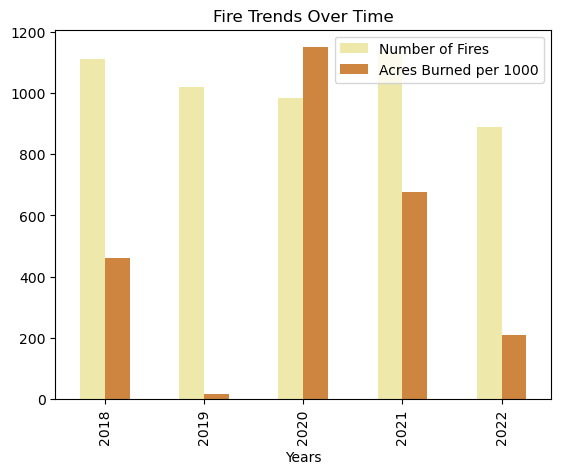

In [74]:
#Chart dataframe
double_year_df.plot(kind="bar", title="Fire Trends Over Time", xlabel="Years", color=("palegoldenrod", "peru"))
plt.show()

In [75]:
#create count of reasons fire was ignited
Count_of_Fire_Count= county_data.groupby(["Human or Nature"]).count()["Cause of Fire"]
Count_of_Fire_Count

Human or Nature
Human           4017
Lightning       1105
Under Invest      15
Name: Cause of Fire, dtype: int64

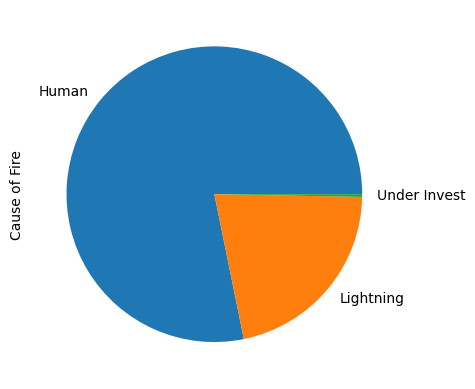

In [76]:
plot = Count_of_Fire_Count.plot.pie()
plt.show()


In [77]:
#Create chart for reasons of fire
Cause=county_data.groupby("Cause of Fire").count()["Year"]
Cause

Cause of Fire
Arson              192
Debris Burning    1130
Equipment Use     1188
Juveniles           39
Lightning         1105
Miscellaneous      584
Railroad            20
Recreation         629
Smoking            170
Under Invest        80
Name: Year, dtype: int64

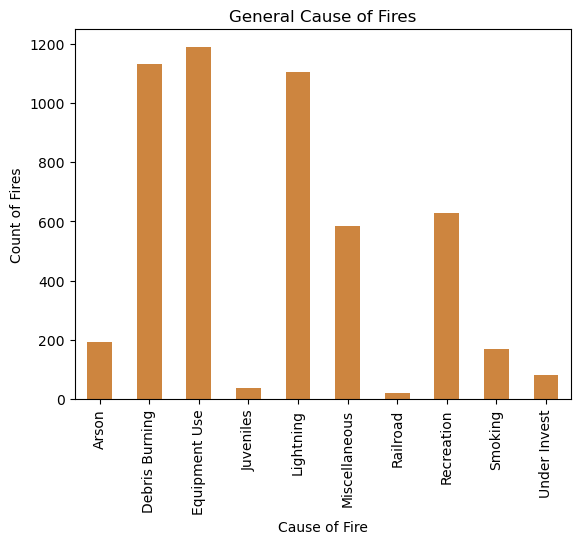

In [78]:
Cause.plot(kind="bar", color="peru", xlabel="Cause of Fire", ylabel="Count of Fires", title=("General Cause of Fires"))
plt.show()

In [79]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#url2 = "http://api.openweathermap.org/data/2.5/air_pollution?"
units = "imperial"


# Build partial query URL
query_url = f"{base_url}appid={api_key}&units={units}&q="
#quary_url2 = f"{url2}appid={api_key}&lat={lat}&lon={lon}&q="

# insert data files and pathways
fire_data_path = "ODF_Fire_Occurrence_Data_2000-2022 (1).csv"
# read the fire data
fire_data  = pd.read_csv(fire_data_path)

# display the fire data
fire_data


,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,...,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,58256,STAT,2000,EOA,Central Oregon,John Day,00-952011-01,Slick Ear #2,B,0.75,...,Does Not Apply - Eastern OR,07/18/2000 07:00:00 PM,07/19/2000 01:20:00 PM,07/19/2000 01:15:00 PM,07/20/2000 12:50:00 AM,07/20/2000 09:13:00 AM,11/14/2000 09:16:00 AM,95,952,011
1,59312,STAT,2000,EOA,Northeast Oregon,La Grande,00-971024-01,Woodley,C,80.00,...,Does Not Apply - Eastern OR,08/24/2000 05:30:00 AM,08/24/2000 01:07:00 PM,08/24/2000 01:07:00 PM,09/01/2000 09:30:00 PM,08/29/2000 03:59:00 PM,12/21/2000 04:22:00 PM,97,971,024
2,61657,STAT,2001,SOA,Southwest Oregon,Grants Pass,01-712133-02,QUEENS BRANCH,A,0.10,...,Lvl 3 Restricted Shutdown,08/10/2001 05:40:00 PM,08/10/2001 05:47:00 PM,08/10/2001 05:45:00 PM,08/10/2001 06:30:00 PM,08/10/2001 06:42:00 PM,08/17/2001 11:45:00 AM,71,712,133
3,63735,STAT,2002,NOA,West Oregon,Philomath,02-551001-03,WREN,A,0.01,...,Lvl 1 Fire Season Only,07/06/2002 01:01:00 PM,07/06/2002 01:04:00 PM,07/06/2002 01:02:00 PM,07/06/2002 01:07:00 PM,07/07/2002 09:16:00 AM,07/28/2002 10:08:00 AM,55,551,001
4,68019,STAT,2003,NOA,West Oregon,Dallas,03-552013-04,Ritner Creek,A,0.01,...,Lvl 3 Restricted Shutdown,08/22/2003 04:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 05:00:00 AM,08/22/2003 09:30:00 AM,08/22/2003 04:12:00 PM,09/04/2003 09:39:00 AM,55,552,013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,124548,STAT,2021,EOA,Walker Range - WRFPA,Crescent,21-991258-21,Road 2430,B,0.75,...,Does Not Apply - Eastern OR,06/26/2021 04:00:00 PM,06/26/2021 04:58:00 PM,06/26/2021 04:45:00 PM,06/26/2021 09:58:00 PM,07/01/2021 12:00:00 AM,10/02/2021 03:08:00 PM,99,991,258
23486,132141,STAT,2022,SOA,Western Lane,Veneta,22-781066-23,Spruce Path,A,0.01,...,Lvl 1 Fire Season Only,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 11:20:00 AM,09/13/2022 12:14:00 PM,09/13/2022 12:00:00 AM,09/19/2022 10:09:00 AM,78,781,066
23487,124065,STAT,2021,EOA,Northeast Oregon,Pendleton,21-973052-21,Bone Canyon,C,67.43,...,Does Not Apply - Eastern OR,06/13/2021 05:22:00 PM,06/14/2021 12:45:00 PM,06/14/2021 12:45:00 PM,06/17/2021 05:10:00 PM,06/14/2021 12:00:00 AM,09/24/2021 01:48:00 PM,97,973,052
23488,131292,STAT,2022,EOA,Northeast Oregon,Pendleton,22-973014-23,Milepost 231,A,0.10,...,Does Not Apply - Eastern OR,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 03:09:00 PM,08/19/2022 04:41:00 PM,08/19/2022 12:00:00 AM,11/08/2022 11:34:00 AM,97,973,014


C:\Users\dmrop\AppData\Local\Temp\ipykernel_7152\3962551669.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_counties = county_wildfire_counts.groupby('County').sum().nlargest(10, 'count')


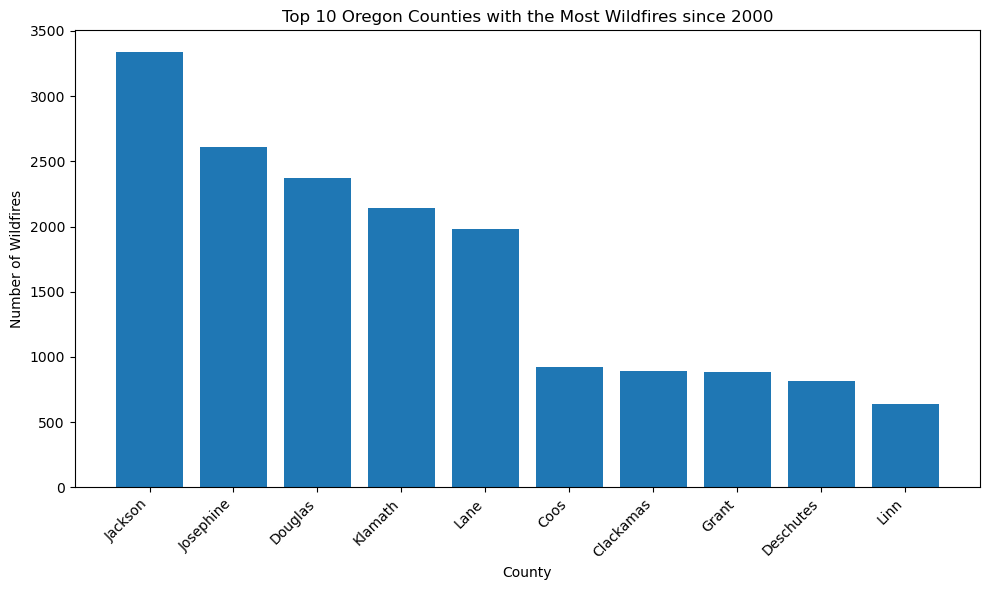

The county with the most wildfires overall is: Jackson


In [80]:
df = pd.read_csv(fire_data_path)

# Group data by county and cause, and count the occurrences
county_wildfire_counts = df.groupby(['County', 'GeneralCause']).size().reset_index(name='count')

# Find the county with the most wildfires overall
county_most_wildfires = county_wildfire_counts.loc[county_wildfire_counts['count'].idxmax()]

# Visualize the top counties with the most wildfires
top_counties = county_wildfire_counts.groupby('County').sum().nlargest(10, 'count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_counties.index, top_counties['count'])
plt.xlabel('County')
plt.ylabel('Number of Wildfires')
plt.title('Top 10 Oregon Counties with the Most Wildfires since 2000')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The county with the most wildfires overall is: {county_most_wildfires['County']}")

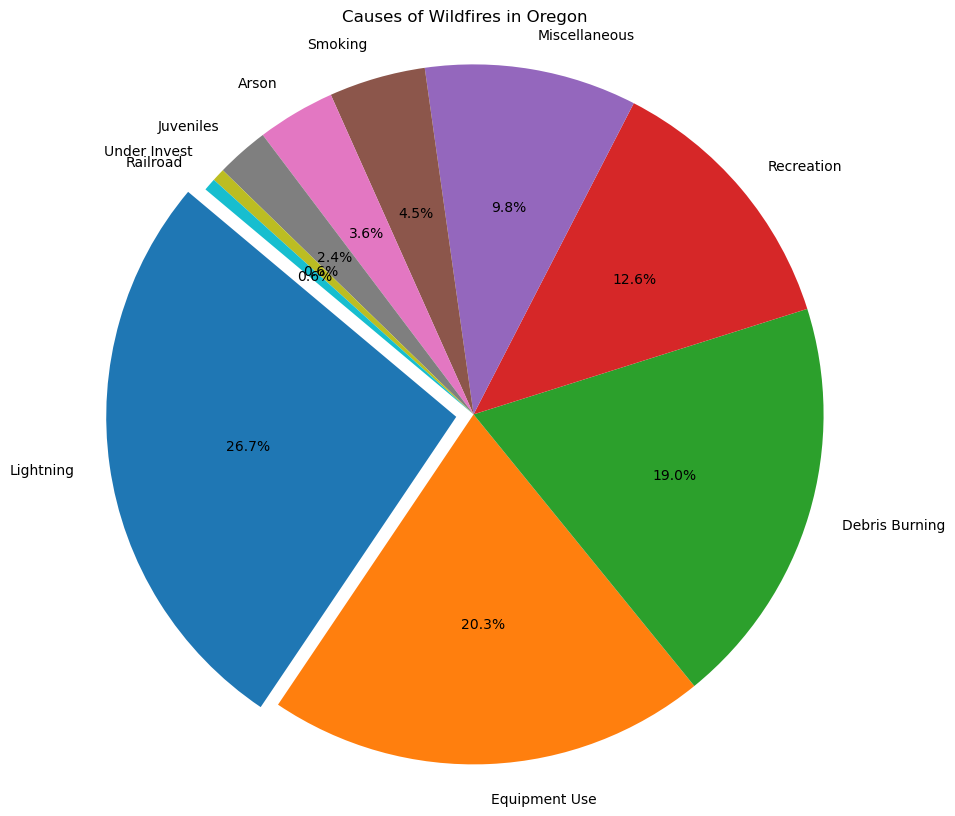

In [81]:
# Group data by the 'CausedBy' column and count the occurrences
caused_by_counts = df['GeneralCause'].value_counts()

explode = [0.05 if cause == caused_by_counts.idxmax() else 0 for cause in caused_by_counts.index]

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(caused_by_counts, labels=caused_by_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Causes of Wildfires in Oregon')
plt.show()

In [82]:
def get_air_quality_data(api_key, lat, lon, start_epoch, end_epoch):
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_epoch}&end={end_epoch}&appid={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def extract_air_quality_data(data):
    air_quality_data = []
    daily_max_aqi = {}  # To store the greatest AQI value for each day

    for item in data["list"]:
        timestamp = pd.Timestamp.fromtimestamp(item["dt"])
        date = timestamp.date()
        aqi = item["main"]["aqi"]

        # Keep track of the greatest AQI value for each day
        if date in daily_max_aqi:
            daily_max_aqi[date] = max(daily_max_aqi[date], aqi)
        else:
            daily_max_aqi[date] = aqi

    for date, max_aqi in daily_max_aqi.items():
        air_quality_data.append({
            "Date": date,
            "Year": date.year,
            "Month": date.month,
            "AQI": max_aqi,
        })

    return air_quality_data

api_key = "2a7b4cc4913b8dfaeb15dacfe2287b16"
lat = 45.523064  # Portland, Oregon latitude
lon = -122.676483  # Portland, Oregon longitude
start_epoch = 1483228800  # January 1, 2020, 00:00:00 UTC
end_epoch = 1672435199  # December 31, 2022, 23:59:59 UTC

data = get_air_quality_data(api_key, lat, lon, start_epoch, end_epoch)
portland_air_quality_data = extract_air_quality_data(data)
portland_df = pd.DataFrame(portland_air_quality_data)

# Group data by Month and AQI, and calculate the count for each combination
monthly_aqi_counts = portland_df.groupby(['Month', 'AQI']).size().unstack(fill_value=0)

monthly_aqi_counts


AQI,1,2,3,4,5
Month,,,,,
1,9,23,7,13,10
2,11,16,6,18,5
3,7,22,5,22,6
4,3,47,8,2,0
5,15,38,8,1,0
6,16,35,8,1,0
7,15,31,14,1,0
8,10,27,19,5,1
9,10,31,13,6,0


<Figure size 1600x600 with 0 Axes>

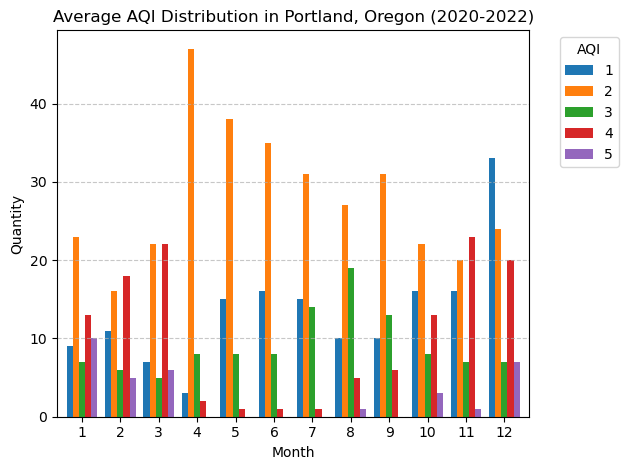

In [83]:
# Group data by Month and AQI, and calculate the count for each combination
monthly_aqi_counts = portland_df.groupby(['Month', 'AQI']).size().unstack(fill_value=0)

# Create a side-by-side bar chart for AQI counts for each month
plt.figure(figsize=(16, 6))
monthly_aqi_counts.plot(kind='bar', width=0.8)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Average AQI Distribution in Portland, Oregon (2020-2022)")
plt.legend(title="AQI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
def get_air_quality_data(api_key, lat, lon, start_epoch, end_epoch):
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_epoch}&end={end_epoch}&appid={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

def extract_air_quality_data(data):
    air_quality_data = []
    daily_max_aqi = {}  # To store the greatest AQI value for each day

    for item in data["list"]:
        timestamp = pd.Timestamp.fromtimestamp(item["dt"])
        date = timestamp.date()
        aqi = item["main"]["aqi"]

        # Keep track of the greatest AQI value for each day
        if date in daily_max_aqi:
            daily_max_aqi[date] = max(daily_max_aqi[date], aqi)
        else:
            daily_max_aqi[date] = aqi

    for date, max_aqi in daily_max_aqi.items():
        air_quality_data.append({
            "Date": date,
            "Year": date.year,
            "Month": date.month,
            "AQI": max_aqi,
        })

    return air_quality_data

lat = 45.523064  # Bend, Oregon latitude
lon = -122.676483  # Bend, Oregon longitude
start_epoch = 1483228800  # January 1, 2020, 00:00:00 UTC
end_epoch = 1672435199  # December 31, 2022, 23:59:59 UTC

data = get_air_quality_data(api_key, lat, lon, start_epoch, end_epoch)
bend_air_quality_data = extract_air_quality_data(data)
bend_df = pd.DataFrame(bend_air_quality_data)

# Group data by Month and AQI, and calculate the count for each combination
monthly_aqi_counts = bend_df.groupby(['Month', 'AQI']).size().unstack(fill_value=0)

monthly_aqi_counts

AQI,1,2,3,4,5
Month,,,,,
1,9,23,7,13,10
2,11,16,6,18,5
3,7,22,5,22,6
4,3,47,8,2,0
5,15,38,8,1,0
6,16,35,8,1,0
7,15,31,14,1,0
8,10,27,19,5,1
9,10,31,13,6,0


<Figure size 1600x600 with 0 Axes>

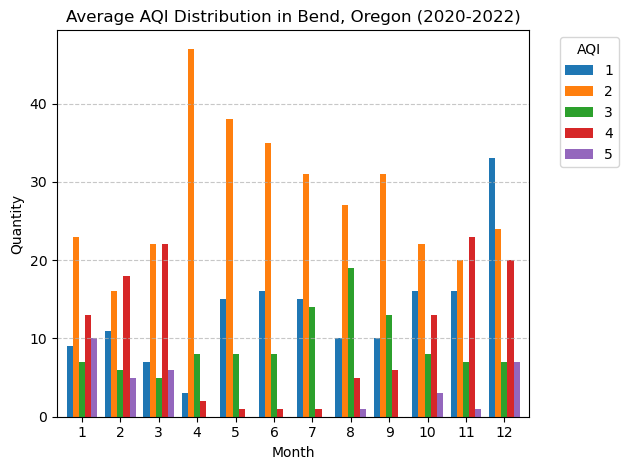

In [85]:
# Group data by Month and AQI, and calculate the count for each combination
monthly_aqi_counts = bend_df.groupby(['Month', 'AQI']).size().unstack(fill_value=0)

# Create a side-by-side bar chart for AQI counts for each month
plt.figure(figsize=(16, 6))
monthly_aqi_counts.plot(kind='bar', width=0.8)
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.title("Average AQI Distribution in Bend, Oregon (2020-2022)")
plt.legend(title="AQI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()